## Bayesian A/B Testing Exercise

In [192]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
# Make plots look nice
plt.style.use('ggplot')


#### 1. You'll find some click-through data in the data folder. There are two files, one for each version of the site.

The 0 refers to a visit without a conversion
The 1 refers to a visit with a conversion.

In [193]:
siteA = np.loadtxt(fname = "data/site_A.txt")
siteB = np.loadtxt(fname = "data/site_B.txt")

#### 2. Let's visualize the distributions

In [194]:
x = np.arange(0, 1.01, 0.01)

In [195]:
## The probabilities will all be the same since it is a uniform distribution
y = stats.uniform(0,1).pdf(x)

In [196]:
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    plt.legend(loc='best')

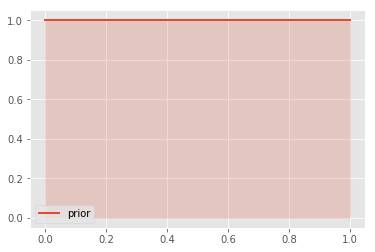

In [197]:
plot_with_fill(x, y, label= 'prior')

#### 3. We will be using a beta distribution to represent the distribution of pA (the CTR for site A). With  parameters alpha=1 and beta=1, the beta distribution is the uniform distribution.

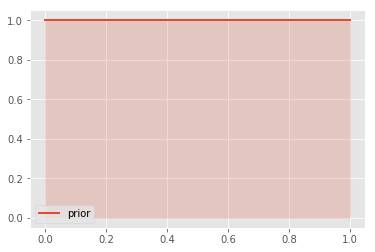

In [198]:
y_prior = stats.beta(a = 1, b = 1).pdf(x)
plot_with_fill(x, y_prior, label= 'prior')

#### 4. Consider the data of siteA for the first 50 views. Draw a plot of the posterior after gathering this data. You should add the alpha parameter the number of conversions you've gotten. To the beta parameter, add the number of non-conversions you've gotten.



In [199]:
def get_pdf(value, site):
    counts = Counter(site[0:value])
    alpha = counts[1]
    beta = counts[0]
    y = stats.beta(a = alpha, b = beta).pdf(x)
    return y 

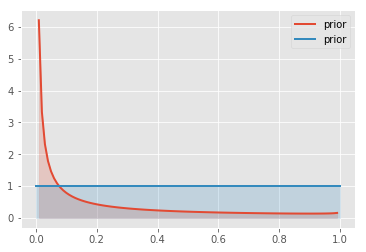

In [200]:
y_50 = get_pdf(50, siteA)
plot_with_fill(x, y_beta2, 'prior')
plot_with_fill(x, y_beta, 'prior')

#### 5. After 50 views, we're starting to hone in on our prediction of pA. Overlay on the same graph the posterior after 50 views, 100 views, 200 views, 400 views and finally all 800 views. You should see as time progresses that we get more certain of the true value of pA.

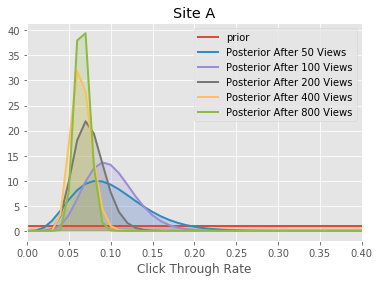

In [201]:
views = [50, 100, 200, 400, 800]
ys = [get_pdf(view, siteA) for view in views]
labels = ['Posterior After {} Views'.format(view) for view in views]
plot_with_fill(x, y_prior, 'prior')
for y, label in zip(ys, labels):
    plot_with_fill(x, y, label)
plt.title('Site A')
plt.xlabel('Click Through Rate')
plt.xlim([0, 0.4]);

#### 6. Now we should understand how we're using the beta distribution to represent the distribution of the possible values of pA. Make a graph that has the final distributions for both pA and pB after all 800 views.

(-0.05, 0.2)

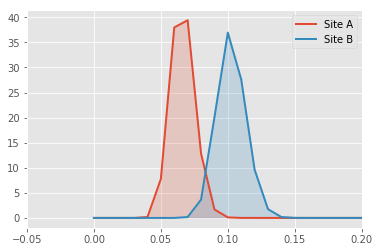

In [202]:
y_A = get_pdf(800, siteA)
y_B = get_pdf(800, siteB)
plot_with_fill(x,y_A, 'Site A')
plot_with_fill(x,y_B, 'Site B')
plt.xlim(right = .2)

#### 7. We now want to determine, given these distributions, what is the probability that site B is better than site A.

In [203]:
def get_random_samples(value, site, n):
    counts = Counter(site[0:value])
    alpha = counts[1]
    beta = counts[0]
    random_samples = stats.beta(a = alpha, b = beta).rvs(n)
    return random_samples

In [204]:
site_A_rs = get_random_samples(800, siteA, 10000)
site_B_rs = get_random_samples(800, siteB, 10000)

In [205]:
Counter(site_A_rs < site_B_rs)
'Probability that site B is better than site A: {}%'.format((9959/ 10000)*100)

'Probability that site B is better than site A: 99.59%'

#### 9. An X% credible interval in a posterior distribution is analogous to a frequentist analysis's confidence intervals. One method of determining a credible interval is the highest density interval (HDI), which is the most dense interval of a posterior distribution containing X% of its mass. Another method is the equal-tailed interval, which is the interval containing X% of the posterior distribution's mass where the probability of being below the interval is as likely as being above it.

#### Determine the 95% equal-tailed interval for site A's beta distribution using the simulations you just performed. 

In [211]:
def get_credible_interval(value, site, percentage):
    counts = Counter(site[0:value])
    alpha = counts[1]
    beta = counts[0]
    interval = stats.beta(a = alpha, b = beta).ppf(percentage)
    return interval

In [212]:
lower_A = np.round(get_credible_interval(800, siteA, .025), 4)
upper_A = np.round(get_credible_interval(800, siteA, .975), 4)

print( "A's 95% HDI is {} to {}".format(lower_A, upper_A))


A's 95% HDI is 0.0501 to 0.0845


#### 10. What is the probability that site B is 2 percentage points better than site A?

In [208]:
Counter(site_A_rs +.02 < site_B_rs)

'Probability that site B is 2% better than site A: {}%'.format((8821/ 10000)*100)

'Probability that site B is 2% better than site A: 88.21%'

#### 11. Lets try a frequentist approach


In [227]:
t, p = stats.ttest_ind(siteA, siteB)
if p < .05:
    print('We can reject the null hypothesis because p is less than .05 with p value of {}'.format(np.round(p/2,4)))

We can reject the null hypothesis because p is 0.0045


In [236]:
t, p2 = stats.ttest_ind(siteA +.02, siteB)
if p2 < .05:
    print('We can reject the null hypothesis because p is {}'.format(np.round(p2/2,4)))
else:
    print('We cannot reject the null hypothesis because p is greater than .05 with p value of {}'.format(np.round(p2/2,4)))

We cannot reject the null hypothesis because p is greater than .05 with p value of 0.1209
